In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [317]:
###### LOGISTIC MAP


def LogisticMap(r,x0,steps):
    
    x = np.array([])    # empty array
    x = np.append(x,x0) # adding the initial value

   
    ### Time evolution loop
    i=1
    while i < steps:
        x=np.append(x,r*x[i-1]*(1-x[i-1]))
        i+=1
    
    t = np.linspace(1,steps,steps) 

    ### PLOT
    plt.figure(figsize=(6,4))
    plt.title('Logistic Map',fontsize=20)
    plt.ylabel('x')
    plt.xlabel('steps')
    plt.ylim(0, 1.5)
    plt.xlim(0, steps)
    
    plt.plot(t,x)
    
    ### TEXT
    plt.text(steps+10,1.5, r'$x_{i+1} = \; r \; x_{i} (1-x_{i}) $',fontsize=15)
    
    if r<=1:
        plt.text(steps+10,1, r'$ 0 \; < \; r \; < \; 1: \qquad x \quad \rightarrow \quad 0$',fontsize=15)
    elif r>1 and r<=3:
        plt.text(steps+10,1, r'$ 1 \; < \; r \; < \; 2: \qquad x \quad \rightarrow \quad \frac{r-1}{r}$',fontsize=15)
    elif r>3 and r<=3.56995:
        plt.text(steps+10,1, r'$ 1 \; < \; r \; < \; 2: \qquad x \quad oscillates$',fontsize=15)
    else:
        plt.text(steps+10,1, r'$ r \;>\; 3.56995: \qquad  CHAOS! $',fontsize=15)
        
    
    
plot = interactive(LogisticMap, r = (0, 4,0.01), x0 = (0,1,0.1),steps=(20,100,10))
plot

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, step=0.01), FloatSlider(value=0.0, desc…

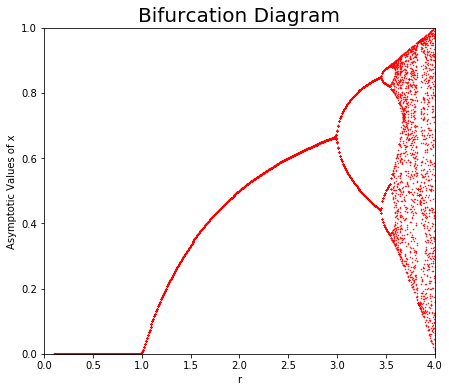

In [315]:
###### Bifurcation Diagram


x0 = 0.2            # initial state
steps = 200         # number of iterations
   
    
R = np.array([])    # array to save the values of r
X = np.array([])    # array to save the last 20 values of x for each r

### Loop to change r
r=0.1
while r <= 4:
    x = np.array([])      # empty array
    x = np.append(x,x0)   # initial state
    
    ### Loop time evolution
    i=1
    while i < steps:
        x = np.append(x,r*x[i-1]*(1-x[i-1]))
        i+=1
        
    X = np.append(X, x[-51:-1])            # taking the last 50 values
    R = np.append(R,[r]*len(x[-51:-1]))    # taking the value of r (times 50)
    r += 0.01

    
#### PLOT
plt.figure(figsize=(7,6))
plt.title('Bifurcation Diagram',fontsize=20)
plt.ylabel('Asymptotic Values of x')
plt.xlabel('r')
plt.plot(R , X, 'ro', ms=0.5)
plt.axis([0, 4, 0, 1]);